# 1. Problem 1

In [1]:
using JuMP, Clp

m = Model()

@variable(m, x1 >= 0)
@variable(m, x2 <= 0)
@variable(m, x3 >= 0)

@objective(m, Min, 0.5*x1 - 7*x2 + x3/3)

@constraint(m, x1 + x2 - 2*x3 >= 7.5)

@constraint(m, -x1 + 3*x2 <= -2)
;

In [204]:
println("Time used by Clp:")

set_optimizer(m, Clp.Optimizer)

@time(optimize!(m))

println("x1:", value(x1))
println("x2:", value(x2))
println("x3:", value(x3))
println("Minimum", objective_value(m))

Time used by Clp:
  0.002968 seconds (7.80 k allocations: 374.500 KiB)
x1:7.5
x2:0.0
x3:0.0
Minimum2.3713318235216513e6
Coin0506I Presolve 13 (-2) rows, 40 (0) columns and 501 (-74) elements
Clp0006I 0  Obj -0 Dual inf 392218.09 (40)
Clp0006I 10  Obj 2371331.8
Clp0000I Optimal - objective value 2371331.8
Coin0511I After Postsolve, objective 2371331.8, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 2371331.824 - 10 iterations time 0.002, Presolve 0.00


In [205]:
(0.003045+0.003427+0.002968)/3

0.003146666666666667

In [3]:
using JuMP, ECOS

m = Model()

@variable(m, x1 >= 0)
@variable(m, x2 <= 0)
@variable(m, x3 >= 0)

@objective(m, Min, 0.5*x1 - 7*x2 + x3/3)

@constraint(m, x1 + x2 - 2*x3 >= 7.5)

@constraint(m, -x1 + 3*x2 <= -2)
;

In [208]:
println("Time used by ECOS:")

set_optimizer(m, ECOS.Optimizer)

@time(optimize!(m))

println("x1:", value(x1))
println("x2:", value(x2))
println("x3:", value(x3))
println("Minimum", objective_value(m))

Time used by ECOS:
  0.004397 seconds (7.17 k allocations: 667.516 KiB)
x1:7.5
x2:0.0
x3:0.0
Minimum2.371331822979462e6

ECOS 2.0.5 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -4.895e+05  -8.504e+05  +1e+06  8e-02  7e-01  1e+00  2e+04    ---    ---    1  1  - |  -  - 
 1  -1.127e+06  -1.450e+06  +6e+05  9e-02  6e-01  1e+04  1e+04  0.7517  3e-01   0  0  0 |  0  0
 2  -2.008e+06  -2.112e+06  +1e+05  3e-02  2e-01  6e+03  2e+03  0.7955  3e-02   0  0  0 |  0  0
 3  -2.300e+06  -2.320e+06  +3e+04  4e-03  4e-02  9e+02  5e+02  0.8115  3e-02   1  1  1 |  0  0
 4  -2.329e+06  -2.337e+06  +1e+04  2e-03  2e-02  4e+02  2e+02  0.6092  5e-02   1  1  1 |  0  0
 5  -2.334e+06  -2.341e+06  +1e+04  2e-03  2e-02  5e+02  2e+02  0.0763  8e-01   1  1  1 |  0  0
 6  -2.364e+06  -2.367e+06  +4e+03  6e-04  6e-03  3e+02  7e+01  0.8255  2e-01   1  1  1 |  0  0
 7  -2.371e+06  -2.371

In [209]:
(0.004772+0.004423+0.004397)/3

0.004530666666666666

In [5]:
using JuMP, SCS

m = Model()

@variable(m, x1 >= 0)
@variable(m, x2 <= 0)
@variable(m, x3 >= 0)

@objective(m, Min, 0.5*x1 - 7*x2 + x3/3)

@constraint(m, x1 + x2 - 2*x3 >= 7.5)

@constraint(m, -x1 + 3*x2 <= -2)
;

In [213]:
println("Time used by SCS:")

set_optimizer(m, SCS.Optimizer)

@time(optimize!(m))

println("x1:", value(x1))
println("x2:", value(x2))
println("x3:", value(x3))
println("Minimum", objective_value(m))

Time used by SCS:
  0.013998 seconds (7.05 k allocations: 665.094 KiB)
x1:7.5
x2:0.0
x3:0.0
Minimum2.371330560267759e6
----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 615, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 40, constraints m = 55
Cones:	linear vars: 55
Setup time: 1.57e-04s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.66e+19  2.46e+18  1.00e+00 -1.42e+25 -0.00e+00  1.34e+26  7.69e-05 
   100| 6.14e-02  6.04e-02  9.81e-04 -2.35e+06 -2.35e+06  2.26

In [214]:
(0.014103+0.013825+0.013998)/3

0.013975333333333334

## Since I run these methods on GCP, the time comsumption of three methods varies a lot: sometimes one method can takes 10-20 seconds to get the optimized results, sometimes only small amout of time is used as shown  above. But usually SCS uses smallest time. This phenomenon will be totally different from those students run these methods on local CPU. As a could computer, working of CPU on the Virtual Machine can be unstable some times. Also the other files of my Jupyter on running can also affect the runing time of optimization method.
## After some tests, the average time is 0.003146666666666667, 0.004530666666666666 and 0.013975333333333334 for Clp, ECOS and SCS. The time used by SCS is obviously longer.
## The minimum obtained by three methods are close: at around 3.75. But the difference is that Clp gives totally zero x2 and x3, but ECOS and SCS gives x2 and x3 close to zero. This comes from the mechanism of the optimization method.

# 2. Problem 2

To form the mathematical model, we assume $x_1$ pound of iron will be used and $x_2$ pound of steel will be used。
Then the mathematical model is：
$$min   x_1-3x_2 $$
$$s.t.-x_1+x_2>=-2$$
$$2x_1+x_2>=6$$
$$x_1+2x_2<=8$$
$$x_1,x_2>=0$$

In [8]:
using JuMP, Clp

m = Model()

@variable(m, x1 >= 0)
@variable(m, x2 >= 0)

@objective(m, Min, -3*x1 + x2)

@constraint(m, -x1 + x2 >= -2)

@constraint(m, 2*x1 + x2 >= 6)

@constraint(m, x1 + 2*x2 <= 8)

println("Time used by Clp:")

set_optimizer(m, Clp.Optimizer)

@time(optimize!(m))

println("x1:", value(x1))
println("x2:", value(x2))
println("Minimum", objective_value(m))

Time used by Clp:
  0.002756 seconds (1.70 k allocations: 118.922 KiB)
x1:4.0
x2:2.0
Minimum-10.0
Coin0506I Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Clp0006I 0  Obj 0 Primal inf 5.9999999 (1) Dual inf 2.9999999 (1)
Clp0006I 2  Obj -10
Clp0000I Optimal - objective value -10
Clp0032I Optimal objective -10 - 2 iterations time 0.002


In [10]:
resources = [:iron, :steel]

requires = [:Damage, :Protection, :Surface]

profit = Dict( zip(resources, [-3, 1]))

requires_limit = Dict( zip(requires, [2, -6, 8] ) );

using NamedArrays

trophy_resource_matrix = [1 -2 1
                          -1 -1 2]

trophy_resource_NA = NamedArray(trophy_resource_matrix, (resources, requires), ("resources","requires"))

2×3 Named Array{Int64,2}
resources ╲ requires │     :Damage  :Protection     :Surface
─────────────────────┼──────────────────────────────────────
:iron                │           1           -2            1
:steel               │          -1           -1            2

In [12]:
using JuMP, Clp

m = Model(Clp.Optimizer)

@variable(m, reso[resources] >= 0)

@expression(m, tot_profit, sum(profit[i] * reso[i] for i in resources) )

@constraint(m, constr[i in requires], sum(trophy_resource_NA[t, i] * reso[t] for t in resources) <= requires_limit[i] )

@objective(m, Min, tot_profit)

optimize!(m)

println(value.(reso))
println("Minimum:", objective_value(m))

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, [:iron, :steel]
And data, a 2-element Array{Float64,1}:
 4.0
 2.0
Minimum:-10.0
Coin0506I Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Clp0006I 0  Obj 0 Primal inf 5.9999999 (1) Dual inf 2.9999999 (1)
Clp0006I 2  Obj -10
Clp0000I Optimal - objective value -10
Clp0032I Optimal objective -10 - 2 iterations time 0.002


## the results are same as pervious one

In [86]:
using Plots

x = 0:0.1:5
f1 = similar(x)
f2 = similar(x)
f3 = similar(x)
l1 = similar(x)
l2 = similar(x)

for i = 1 : size(x)[1]
    f1[i] =  -2 + x[i]
    end

for i = 1 : size(x)[1]
    f2[i] =  6 - 2*x[i]
    end

for i = 1 : size(x)[1]
    f3[i] =  4 - 0.5*x[i]
    end

for i = 1 : size(x)[1]
    l1[i] =  -10 + 3*x[i]
    end

for i = 1 : size(x)[1]
    l2[i] =  -2+3*x[i]
    end

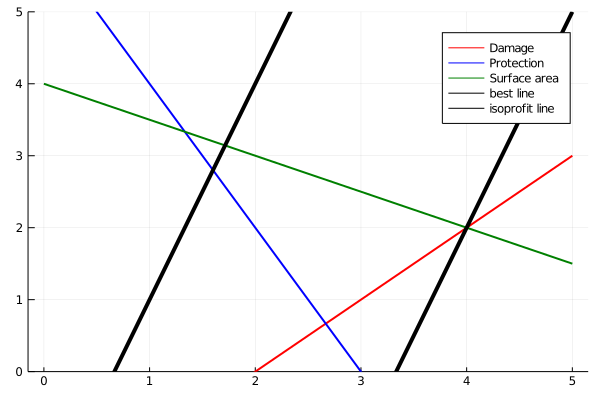

In [87]:
p1 = plot(x,f1, color=:red, linewidth = 2, label="Damage", ylims =(0, 5))
plot!(p1, x,f2, color=:blue, linewidth = 2, label="Protection") # "plot!" means "plot on the same canvas we just plotted on"
plot!(p1, x,f3, color=:green, linewidth = 2, label="Surface area")
plot!(p1, x,l1, color=:black, linewidth = 4, label="best line")
plot!(p1, x,l2, color=:black, linewidth = 4, label="isoprofit line")

## from the mathematical model, we know that the feasible zone is a triangular area in the center, so the solution given by graphic solution is the same as we calculated before at $x_1 = 4$ and $x_2=2$ and minimum is -10

# 3. Problem 3

## The standard form shoud be:
## $$ max -0.5y_1-7y_2-y_3/3$$
## $$s.t. -y_1+y_2+2y_3<=-7.5$$
## $$-y_1-3y_2<=-2$$
## $$y_1,y_2,y_3>=0$$

## A=[-1, 1, 2;      b = [-7.5;-2]  c=[-0.5; -7; -1/3]  d=0, x=[$y_1$; $y_2$; $y_3$]
##      -1, -3, 0]

## where $y_1=x_1$, $y_3=x_3$, $y_2=-x_2$

## origional form

In [92]:
using JuMP, Clp

m = Model()

@variable(m, x1 >= 0)
@variable(m, x2 <= 0)
@variable(m, x3 >= 0)

@objective(m, Min, 0.5*x1 - 7*x2 + x3/3)

@constraint(m, x1 + x2 -2*x3 >= 7.5)

@constraint(m, -x1 + 3*x2 <= -2)

println("Time used by Clp:")

set_optimizer(m, Clp.Optimizer)

@time(optimize!(m))

println("x1:", value(x1))
println("x2:", value(x2))
println("x3:", value(x3))
println("Minimum", objective_value(m))

Time used by Clp:
  0.002503 seconds (1.72 k allocations: 120.156 KiB)
x1:7.5
x2:0.0
x3:0.0
Minimum3.75
Coin0506I Presolve 0 (-2) rows, 0 (-3) columns and 0 (-5) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 3.75
Coin0511I After Postsolve, objective 3.75, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 3.75 - 0 iterations time 0.002, Presolve 0.00


In [96]:
using JuMP, Clp

m = Model()

@variable(m, y1 >= 0)
@variable(m, y2 >= 0)
@variable(m, y3 >= 0)

@objective(m, Max, -0.5*y1 - 7*y2 - y3/3)

@constraint(m, -y1 + y2 + 2*y3 <= -7.5)

@constraint(m, -y1 - 3*y2 <= -2)

println("Time used by Clp:")

set_optimizer(m, Clp.Optimizer)

@time(optimize!(m))

println("y1:", value(y1))
println("y2:", value(y2))
println("y3:", value(y3))
println("Maximum", objective_value(m))

Time used by Clp:
  0.001786 seconds (1.58 k allocations: 109.953 KiB)
y1:7.5
y2:0.0
y3:0.0
Maximum-3.75
Coin0506I Presolve 0 (-2) rows, 0 (-3) columns and 0 (-5) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value -3.75
Coin0511I After Postsolve, objective -3.75, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -3.75 - 0 iterations time 0.002, Presolve 0.00


## Obviously, we have the same results in two forms.

# 4. Problem 4

# Model

## Assume amounts of ore from different sites are $x_1$, $x_2$, ﹍, $x_{40}$
## $$max \sum_{i=0}^{n}{{Value}_i*x_i}$$
## $$x_1, x_2, ﹍, x_{40 }\geq 0$$
## $$x_1 + x_2+ ﹍+ x_{40} \leq 1000$$
## $$Attrmin_{j}\leq\frac{\sum_{i=0}^{n}{Attr_{ji}*x_i}}{\sum_{i=0}^{n}{x_i}}\leq Attrmax_{j}$$

## transform model into new form
## $$max \sum_{i=0}^{n}{{Value}_i*x_i}$$
## $$x_1, x_2, ﹍, x_{40 }\geq 0$$
## $$x_1 + x_2+ ﹍+ x_{40} \leq 1000$$
## $${\sum_{i=0}^{n}{(Attrmin_{j}-Attr_{ji}})}{x_i}\leq 0$$
## $${\sum_{i=0}^{n}{(Attr_{ji}-Attrmax_{j}})}{x_i}\leq 0$$

In [163]:
using CSV, DataFrames, NamedArrays

raw = CSV.read("mineco.csv");

mine_array = convert(Array,raw);

attributes = names(raw[:,3:end]);

sites = mine_array[3:end,1];

ore_val = Dict(zip(sites, mine_array[3:end,2]));

min_percent = Dict(zip(attributes,mine_array[1,3:end]));
max_percent = Dict(zip(attributes,mine_array[2,3:end]));

mine_attribute_matrix = mine_array[3:end,3:end];

mine_attribute_array = NamedArray(mine_attribute_matrix, (sites, attributes),("sites","attributes"))

40×7 Named Array{Any,2}
sites ╲ attributes │   Gold (%)  Carbon (%)  …    Coal (%)  Silica (%)
───────────────────┼──────────────────────────────────────────────────
1                  │          6          16  …           7          12
2                  │         10          12              8          10
3                  │          4           9             19          19
4                  │         20           8              8          16
5                  │         14           9              8           8
6                  │         11           5             11          19
7                  │          3          14             17          10
8                  │         18           2             15          11
9                  │          7          13             10          11
10                 │         17          18              6          19
11                 │          8          13             18          15
12                 │          2          19          

In [164]:
using JuMP, Clp

m = Model(Clp.Optimizer)

@variable(m, site[sites] >= 0)

@expression(m, tot_profit, sum(ore_val[i] * site[i] for i in sites) )

@constraint(m, constr1[i in attributes], sum((mine_attribute_array[t, i]-max_percent[i]) * site[t] for t in sites) <= 0)

@constraint(m, constr2[i in attributes], sum((min_percent[i]-mine_attribute_array[t, i]) * site[t] for t in sites) <= 0)

@constraint(m, constr3, sum(site[t] for t in sites) <= 1000)

@objective(m, Max, tot_profit)

optimize!(m)

println(value.(site))
println("Maximum:", objective_value(m))

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, Any["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"  …  "31", "32", "33", "34", "35", "36", "37", "38", "39", "40"]
And data, a 40-element Array{Float64,1}:
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
 417.7697086963897
   0.0
   0.0
  52.148183514364135
   0.0
   0.0
 173.1299589775162
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
 181.17111966880475
 114.76872239777362
   0.0
   0.0
   0.0
   0.0
  61.012306745151704
Maximum:2.3713318235216513e6
Coin0506I Presolve 13 (-2) rows, 40 (0) columns and 501 (-74) elements
Clp0006I 0  Obj -0 Dual inf 392218.09 (40)
Clp0006I 10  Obj 2371331.8
Clp0000I Optimal - objective value 2371331.8
Coin0511I After Postsolve, objective 2371331.8, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 2371331.824 - 10 iterations time 0.002, Presolve 0.00


# So above we see the amout of ores extracted from different sites accounted in tons. Transform into a clear form:

In [187]:
df=convert(DataFrame, Dict(zip(sites, value.(site))))

,1,10,11,12,13,14,15,16,17
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,0.0,417.77,0.0,0.0,52.1482


In [190]:
df[:,10:18]

,18,19,2,20,21,22,23,24,25
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,173.13,0.0,0.0,0.0,0.0,0.0


In [191]:
df[:,19:27]

,26,27,28,29,3,30,31,32,33
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
df[:,28:36]

,34,35,36,37,38,39,4,40,5
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,181.171,114.769,0.0,0.0,0.0,0.0,0.0,61.0123,0.0


In [193]:
df[:,37:40]

,6,7,8,9
,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0
